<a href="https://colab.research.google.com/github/dayananikol/dl_models/blob/main/Copy_of_MODEL2_bentory_wUnknown7_1stDataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import os

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [3]:
# Set paths
dataset_dir = '/content/drive/MyDrive/bentory_dataset/final_ready_dataset'

# Define image size and batch
IMG_SIZE = 224
BATCH_SIZE = 32

# # Generator with augmentation for training/validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# # or try with these augmentation,
# datagen = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=20,             # slight increase
#   width_shift_range=0.1,
#    height_shift_range=0.1,
#   zoom_range=0.2,                # increase zoom randomness
#    shear_range=0.1,               # simulate perspective tilt
#    brightness_range=[0.8, 1.2],   # simulate lighting changes
#    horizontal_flip=True,
#    validation_split=0.2,
#    fill_mode='nearest'            # handle empty pixels after rotation/shift
# )


# Train generator
train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator
val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Test generator (no augmentation, no split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/bentory_dataset/final_ready_dataset_test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 3832 images belonging to 11 classes.
Found 957 images belonging to 11 classes.
Found 550 images belonging to 11 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    Dropout(0.3),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# model.compile(
#     optimizer=SGD(learning_rate=0.01, momentum=0.9), # Example with learning rate and momentum
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.1824 - loss: 3.1169 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.50219, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 2488s 21s/step - accuracy: 0.1836 - loss: 3.1089 - val_accuracy: 0.6228 - val_loss: 1.5022
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6444 - loss: 1.1039
Epoch 2: val_loss improved from 1.50219 to 0.87175, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 584s 5s/step - accuracy: 0.6449 - loss: 1.1025 - val_accuracy: 0.7910 - val_loss: 0.8718
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8091 - loss: 0.6128
Epoch 3: val_loss improved from 0.87175 to 0.40490, saving model to best_model.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 655s 5s/step - accuracy: 0.8093 - loss: 0.6122 - val_accuracy: 0.8871 - val_loss: 0.4049
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8808 - loss: 0.3896
Epoch 4: val_loss did not improve from 0.40490
120/120 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.8810 - loss: 0.3891 - val_accuracy: 0.8631 - val_loss: 0.5458
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9014 - loss: 0.3220
Epoch 5: val_loss did not improve from 0.40490
120/120 ━━━━━━━━━━━━━━━━━━━━ 610s 5s/step - accuracy: 0.9015 - loss: 0.3220 - val_accuracy: 0.8788 - val_loss: 0.4224


In [6]:
loss, accuracy = model.evaluate(test_gen)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 254s 15s/step - accuracy: 0.9585 - loss: 0.1325
Test Loss: 0.29403775930404663
Test Accuracy: 0.9054545164108276


In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Evaluate the model
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step
Classification Report:
                         precision    recall  f1-score   support

             Bear Brand       0.93      1.00      0.96        50
                     C2       0.91      0.96      0.93        50
         Datu Puti Suka       0.88      1.00      0.93        50
         Datu Puti Toyo       0.91      0.98      0.94        50
                   Ligo       0.96      0.96      0.96        50
            Magic Sarap       0.87      0.90      0.88        50
Pancit Canton Kalamansi       0.94      0.98      0.96        50
              Safeguard       0.84      0.98      0.91        50
            Surf Powder       0.92      0.92      0.92        50
                Unknown       1.00      0.38      0.55        50
                  V Cut       0.88      0.90      0.89        50

               accuracy                           0.91       550
              macro avg       0.91      0.91      0.89       550
           weighted avg   

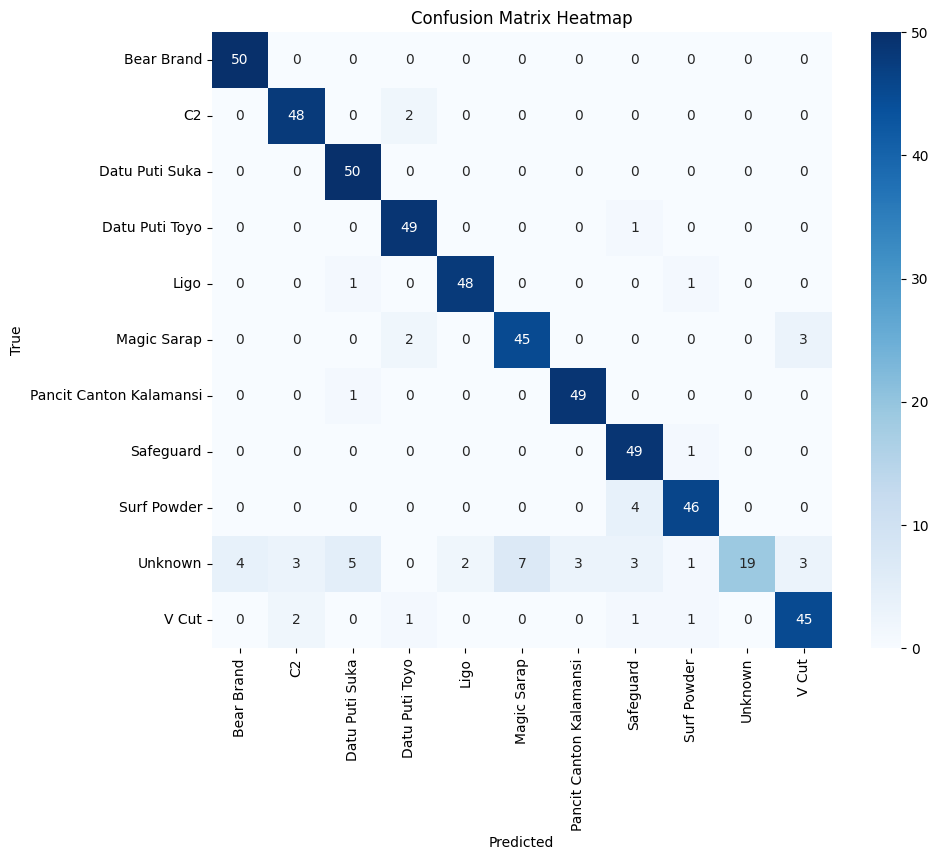

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Use the true_classes and predicted_classes calculated earlier
true_labels = true_classes
pred_labels = predicted_classes

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names = list(test_gen.class_indices.keys()) # Use class names from test_gen

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

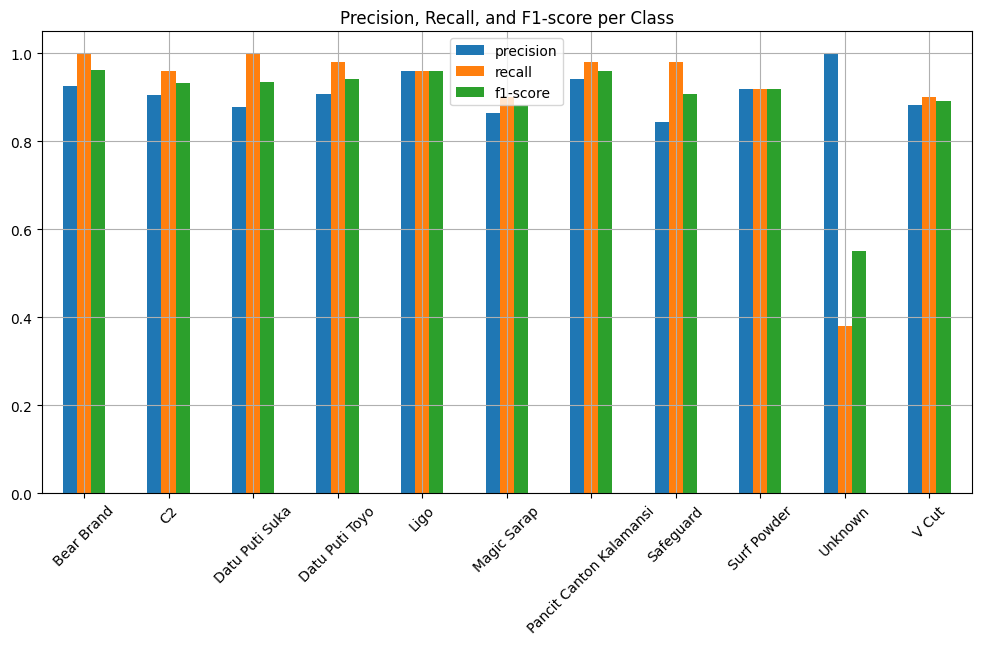

In [9]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as dictionary
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot
df_report.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-score per Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


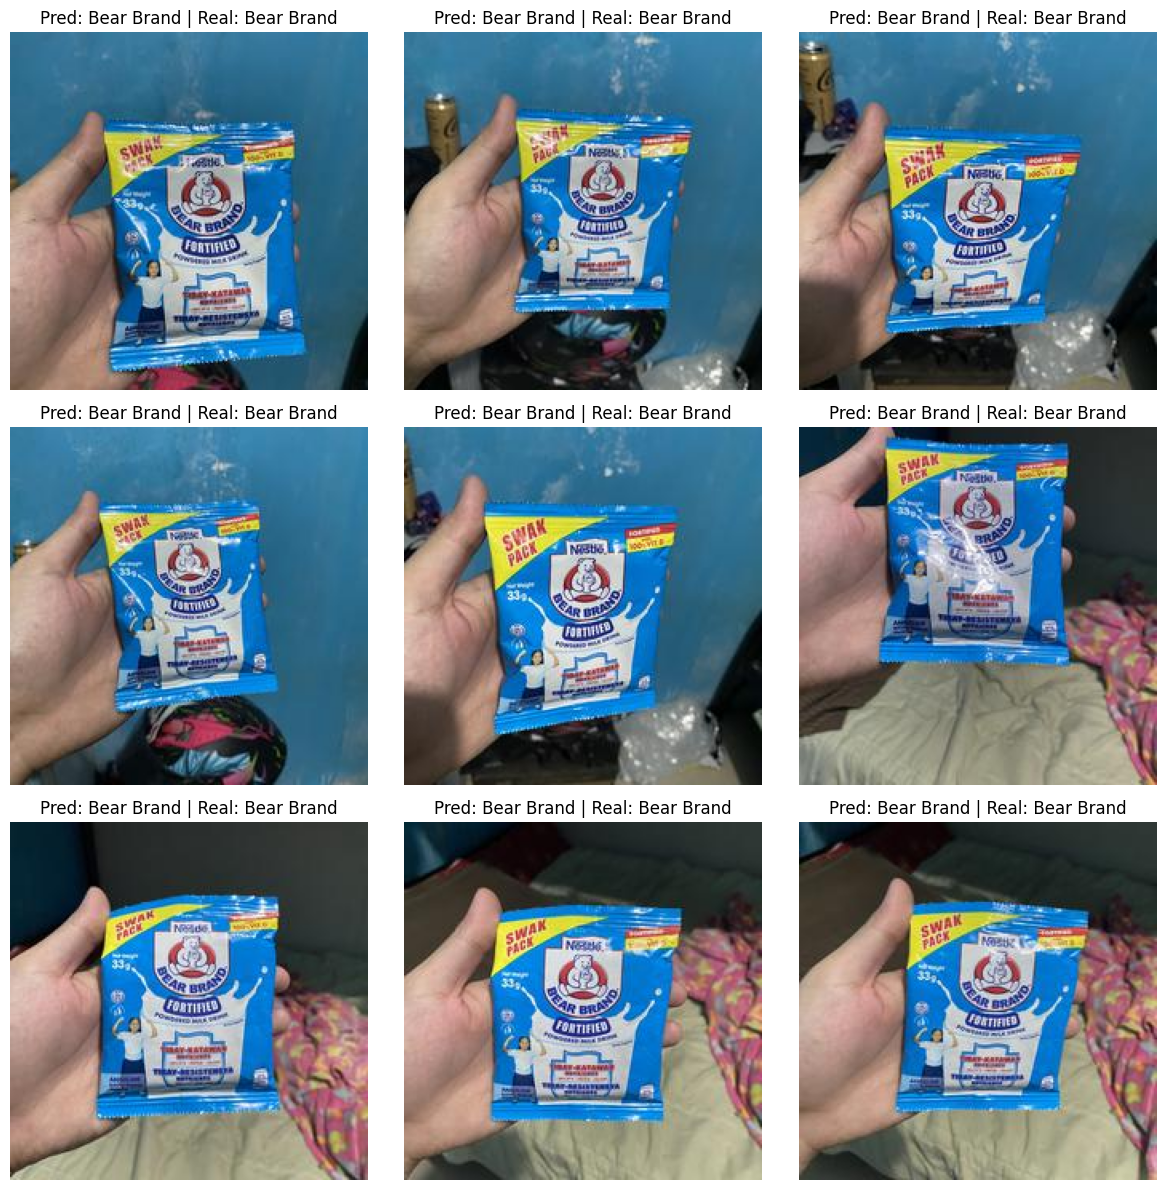

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from the test generator
images, labels = next(test_gen)

# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Select the first 9 images and their true labels
num_images_to_show = 9
selected_images = images[:num_images_to_show]
selected_labels = labels[:num_images_to_show]

# Determine the true class names for the selected labels
true_class_names = [class_names[np.argmax(label)] for label in selected_labels]

# Get predictions for the selected images
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_class_names = [class_names[predicted_class] for predicted_class in predicted_classes]

# Plot the images
plt.figure(figsize=(12, 12))
for i in range(num_images_to_show):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i])
    plt.title(f"Pred: {predicted_class_names[i]} | Real: {true_class_names[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf

h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset//best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

# import tensorflow as tf
# import os

# # Path to your trained .h5 model file
# h5_model_path = 'best_model.h5'

# # Load the model from the .h5 file
# model = tf.keras.models.load_model(h5_model_path)

# # Define a directory to save the model in the SavedModel format
# saved_model_dir = 'saved_model_directory'

# # Save the model in the SavedModel format using model.export()
# # This is the correct method for exporting to the SavedModel format
# model.export(saved_model_dir)

# # Now use the directory path with the TFLiteConverter
# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# # Optional: Apply optimization (reduce size)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Convert the model
# tflite_model = converter.convert()

# # Save to file
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# print("✅ Model successfully converted to model.tflite")

Saved artifact at '/tmp/tmpeperztnc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  136419089660048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419089661584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419089660432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419089661008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086926864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086928592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086928208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086929936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086929168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086931280: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [12]:
h5_model_path = 'best_model.h5'

model = tf.keras.models.load_model(h5_model_path)

    # Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

drive_save_path = '/content/drive/MyDrive/bentory_dataset/best_model.tflite' # <--- Change 'your_model_folder'

# Save the TensorFlow Lite model to a file
with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmptudy3n0w'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  136419089661776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419218149968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086933584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086942032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086940688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086939728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086931472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086931664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086939344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136419086938384: TensorSpec(shape=(), dtype=tf.resource, name=None)


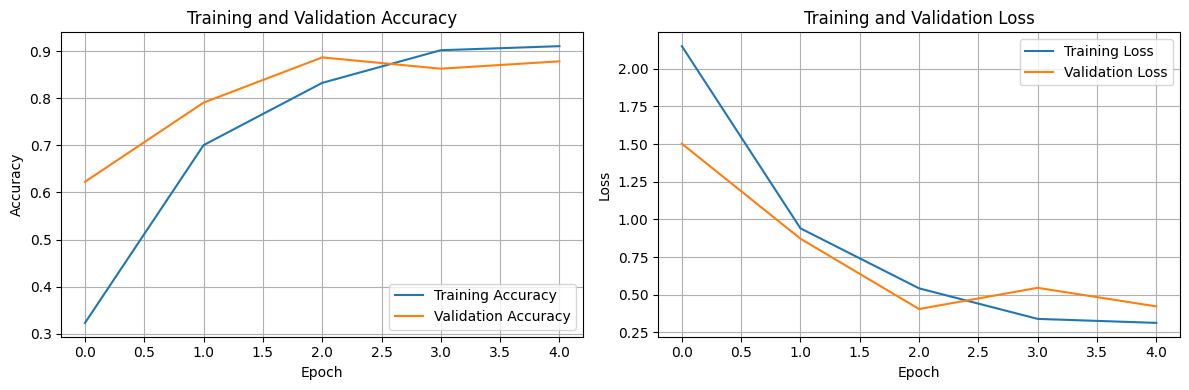

In [13]:
import matplotlib.pyplot as plt

# Get the history from the training
# Assuming 'history' or 'history_continued' contains the training history
# If you ran the last cell, use history_continued, otherwise use history
# Let's use 'history' for now, assuming the last run didn't complete fully.
# If you successfully ran the cell to continue training, change 'history' to 'history_continued'
training_history = history

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()